In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import numpy as np
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 
from math import sqrt

In [2]:
data_frame = pd.read_csv("../one_year_data.csv")
data_frame = data_frame.iloc[:, 1:492]

In [3]:
data = np.where(np.isnan(data_frame), 0, data_frame)

In [4]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(X_normalized) 
  
# Renaming the columns 
#X.columns = data.columns 
  
X.head() 

,0,1,2,3,4,5,6,7,8,9,...,480,481,482,483,484,485,486,487,488,489
0,-0.000558,-0.053236,-0.032656,-0.046220,-0.034588,-0.075685,-0.061709,-0.023132,0.063000,0.023642,...,0.036484,-0.050095,-0.070502,-0.052626,-0.031057,-0.033442,-0.045274,-0.062658,-0.008694,-0.039644
1,-0.000408,-0.052679,-0.031007,-0.042655,-0.034620,-0.074625,-0.062164,-0.023701,0.066421,0.019194,...,0.035530,-0.047371,-0.067279,-0.052220,-0.034452,-0.030570,-0.045171,-0.060080,-0.002747,-0.037712
2,-0.000785,-0.051016,-0.029895,-0.044283,-0.040044,-0.072820,-0.059760,-0.028737,0.066765,0.011737,...,0.042893,-0.044584,-0.065736,-0.052617,-0.039092,-0.033117,-0.044393,-0.057608,-0.009877,-0.039014
3,-0.000477,-0.045501,-0.030537,-0.044444,-0.037028,-0.074649,-0.057182,-0.027317,0.065229,0.033280,...,0.056885,-0.043425,-0.065479,-0.052678,-0.032940,-0.035694,-0.041225,-0.058911,-0.007239,-0.038946
4,-0.001082,-0.045820,-0.029375,-0.042084,-0.041014,-0.075645,-0.056820,-0.022907,0.065192,0.018265,...,0.047599,-0.045563,-0.064999,-0.058815,-0.032928,-0.036832,-0.040304,-0.049862,-0.012074,-0.039873


In [5]:
# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
optics_model.fit(X) 

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=10, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [6]:
# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 0.5) 
  
# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 2) 
  
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5 -1 -1 -1]


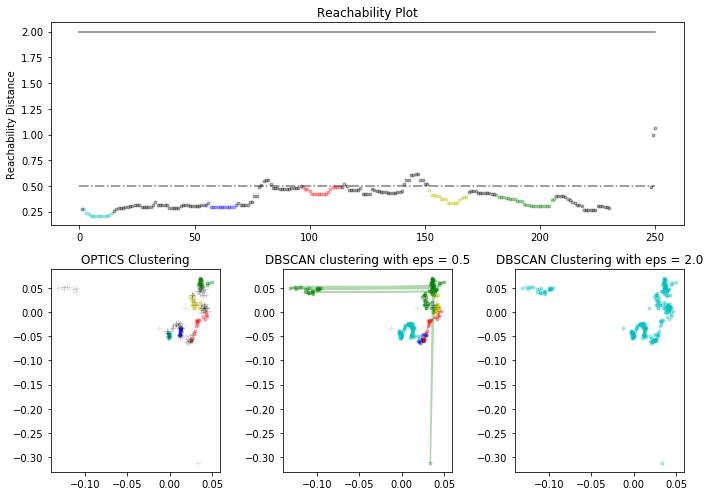

In [7]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X.iloc[optics_model.labels_ == -1, 0], 
        X.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X.iloc[labels1 == -1, 0], 
        X.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X.iloc[labels2 == -1, 0], 
        X.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show() 